In [1]:
#2020-02-26 @author: Hunter Darling

# MTH 452 Homework 5 pt 1

## Exercise 8.1.3

$ x_i: 1.0,   1.1,   1.3,   1.5,   1.9,   2.1  $

$ y_i: 1.84,  1.96,  2.21,  2.45,  2.94,  3.18 $

<font color=green> Find the least squares polynomials of degree 1, 2, and 3 for the data. Compute the error E in each case. Graph the data and the polynomials. 

#### <font color = blue> Case 1: polynomial of degree 1, $ P_1(x)=a+bx $ ... (1)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
sp.init_printing()

$\sum y = na + b\sum x$ ... (2)

$\sum xy = a\sum x + b\sum x^2$ ... (3)

In [3]:
n=6
a = np.array([[1.0, 1.84], [1.1, 1.96], [1.3, 2.21], [1.5, 2.45], [1.9, 2.94], [2.1, 3.18]])
x_i = [i[0] for i in a]
y_i = [i[1] for i in a]
sum_x = sum([i for i in x_i])
sum_y = sum([i for i in y_i])
sum_xy = sum(i[0]*i[1] for i in a)
sum_x2 = sum([i[0]**2 for i in a])

In [4]:
sum_x, sum_y, sum_xy, sum_x2

Substitute calculated values into (2) and (3)... $(n=6)$

$14.58 = 6a + 8.9b$ ... (4)

$22.808 = 8.9a + 14.17b$ ... (5)

Solve augment matrix ... 

In [5]:
A_1 = np.array([[n, sum_x], 
                [sum_x, sum_x2]])
b_1 = np.array([sum_y, sum_xy])
x_1 = np.linalg.solve(A_1, b_1)
x_1

array([0.62089501, 1.21962134])

Substitute into (1)...

1st degree least squares polynomial approximation:

#### $P_1 = 0.62089501 + 1.21962134 x $

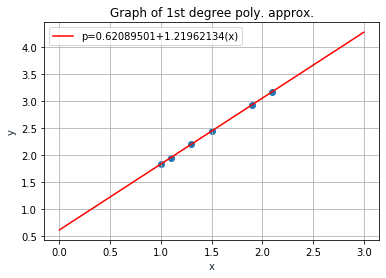

In [6]:
x_1p = np.linspace(0,3,100)
p_1 = 0.62089501+1.21962134*x_1p
plt.plot(x_1p,p_1, '-r', label='p=0.62089501+1.21962134(x)')
plt.scatter(x_i,y_i)
plt.title('Graph of 1st degree poly. approx.')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Total error: $E_1 = \sum_i^6 (y_i - P_1(x_i))^2$

where $P_1(x_i)$ is the approximation at each $x_i$ using $P_1=0.62089501+1.21962134x$

In [7]:
p_i_1 = [(0.62089501+1.21962134*x) for x in x_i]
E_1 = 0
for i in range(0, n):
    E_1 += ((y_i[i] - p_i_1[i])*(y_i[i] - p_i_1[i]))
print('Total Error = ',E_1)

Total Error =  2.7194492254768442e-05


#### <font color=blue> Case 2: polynomial of degree 2, $ P_2(x)=a+bx+cx^2 $ ... (6)

$\sum y = na + b\sum x + c\sum x^2$ ... (7)

$\sum xy = a\sum x + b\sum x^2 + c\sum x^3$ ... (8)

$\sum x^2y = a\sum x^2 + b\sum x^3 + c\sum x^4$ ... (9)

In [8]:
sum_x3 = sum([i**3 for i in x_i])
sum_x2y = sum([(i[0]**2)*i[1] for i in a])
sum_x4 = sum([i**4 for i in x_i])

In [9]:
sum_x, sum_y, sum_xy, sum_x2, sum_x3, sum_x2y, sum_x4

Substitute calculated values into (7), (8), and (9)... $(n=6)$

$14.58 = 6a + 8.9b + 14.17c$ ... (10)

$22.808 = 8.9a + 14.17b + 24.023c$ ... (11)

$38.096 = 14.17a + 24.023b + 42.863c$ ... (12)

Solve...

In [10]:
A_2 = np.array([[n, sum_x, sum_x2], 
                [sum_x, sum_x2, sum_x3], 
                [sum_x2, sum_x3, sum_x4]])
b_2 = np.array([sum_y, sum_xy, sum_x2y])
x_2 = np.linalg.solve(A_2, b_2)
x_2

array([ 0.59658071,  1.25329314, -0.01085343])

Substitute into (6)...

2nd degree least squares polynomial approximation:

#### $P_2 = 0.59658071 + 1.25329314 x - 0.01085343 x^2 $

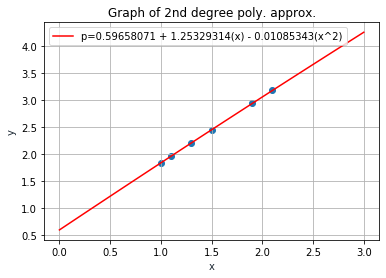

In [11]:
x_2p = np.linspace(0,3,100)
p_2 = 0.59658071 + 1.25329314*x_2p - 0.01085343*(x_2p**2)
plt.plot(x_2p,p_2, '-r', label='p=0.59658071 + 1.25329314(x) - 0.01085343(x^2)')
plt.scatter(x_i,y_i)
plt.title('Graph of 2nd degree poly. approx.')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Total error: $E_2 = \sum_i^6 (y_i - P_2(x_i))^2$

where $P_2(x_i)$ is the approximation at each $x_i$ using $P_2 = 0.59658071 + 1.25329314 x - 0.01085343 x^2$

In [12]:
p_i_2 = [(0.59658071 + 1.25329314*x - 0.01085343*(x**2)) for x in x_i]
E_2 = 0
for i in range(0, n):
    E_2 += ((y_i[i] - p_i_2[i])*(y_i[i] - p_i_2[i]))
print('Total Error = ',E_2)

Total Error =  1.8014842302454737e-05


#### <font color=blue> Case 3: polynomial of degree 3, $ P_3(x)=a+bx+cx^2+dx^3 $ ... (13)

$\sum y = na + b\sum x + c\sum x^2 + d\sum x^3$ ... (14)

$\sum xy = a\sum x + b\sum x^2 + c\sum x^3 + d\sum x^4$ ... (15)

$\sum x^2y = a\sum x^2 + b\sum x^3 + c\sum x^4 + d\sum x^5$ ... (16)

$\sum x^3y = a\sum x^3 + b\sum x^4 + c\sum x^5 + d\sum x^6$ ... (17)

In [13]:
sum_x5 = sum([i**5 for i in x_i])
sum_x3y = sum([(i[0]**3)*i[1] for i in a])
sum_x6 = sum([i**6 for i in x_i])

In [14]:
sum_x, sum_y, sum_xy, sum_x2, sum_x3, sum_x2y, sum_x4, sum_x5, sum_x3y, sum_x6

Substitute and solve aug matrix...

In [15]:
A_3 = np.array([[n, sum_x, sum_x2, sum_x3], 
                [sum_x, sum_x2, sum_x3, sum_x4], 
                [sum_x2, sum_x3, sum_x4, sum_x5],
                [sum_x3, sum_x4, sum_x5, sum_x6]])
b_3 = np.array([sum_y, sum_xy, sum_x2y, sum_x3y])
x_3 = np.linalg.solve(A_3, b_3)
x_3

array([ 0.62901928,  1.1850098 ,  0.03533252, -0.01004723])

Substitute into (13)...

3rd degree least squares polynomial approximation:

#### $P_3 = 0.62901928 + 1.1850098 x + 0.03533252 x^2 - 0.01004723 x^3 $

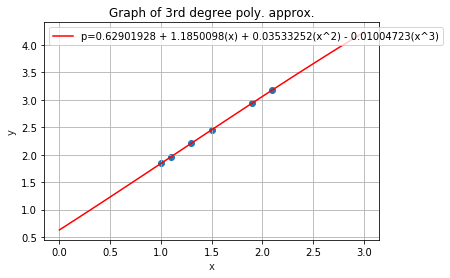

In [16]:
x_3p = np.linspace(0,3,100)
p_3 = 0.62901928 + 1.1850098*x_3p + 0.03533252*(x_3p**2) - 0.01004723*(x_3p**3)
plt.plot(x_3p,p_3, '-r', label='p=0.62901928 + 1.1850098(x) + 0.03533252(x^2) - 0.01004723(x^3)')
plt.scatter(x_i,y_i)
plt.title('Graph of 3rd degree poly. approx.')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Total error: $E_3 = \sum_i^6 (y_i - P_3(x_i))^2$

where $P_3(x_i)$ is the approximation at each $x_i$ using $P_3 = 0.62901928 + 1.1850098 x + 0.03533252 x^2 - 0.01004723 x^3$

In [17]:
p_i_3 = [(0.62901928 + 1.1850098*x + 0.03533252*(x**2) - 0.01004723*(x**3)) for x in x_i]
E_3 = 0
for i in range(0, n):
    E_3 += ((y_i[i] - p_i_3[i])*(y_i[i] - p_i_3[i]))
print('Total Error = ',E_3)

Total Error =  1.7407310954369473e-05
